In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/ML/Kaggle"

In [3]:
%cd /content/drive/My Drive/ML/Kaggle

/content/drive/My Drive/ML/Kaggle


In [4]:
ls

asl-alphabet.zip  kaggle.json


In [5]:
!unzip \*.zip &> /dev/null && rm *.zip

In [11]:
pip install scikit-image

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


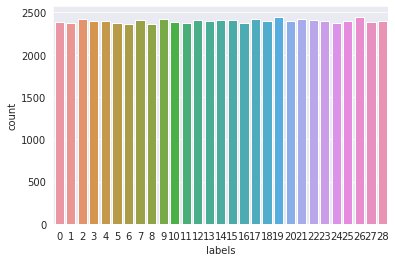

In [62]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [161]:
!mkdir asl-alphabet-test-copy2
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_train/asl_alphabet_train/A" "asl-alphabet-test-copy2/A"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_train/asl_alphabet_train/B" "asl-alphabet-test-copy2/B"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_train/asl_alphabet_train/C" "asl-alphabet-test-copy2/C"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_train/asl_alphabet_train/D" "asl-alphabet-test-copy2/D"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_train/asl_alphabet_train/E" "asl-alphabet-test-copy2/E"

mkdir: cannot create directory ‘asl-alphabet-test-copy2’: File exists


In [165]:
!mkdir "./asl-sign-language-pictures-minus-j-z"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_test/asl_alphabet_test/A_test.jpg" "./asl-sign-language-pictures-minus-j-z/A"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_test/asl_alphabet_test/B_test.jpg" "./asl-sign-language-pictures-minus-j-z/B"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_test/asl_alphabet_test/C_test.jpg" "./asl-sign-language-pictures-minus-j-z/C"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_test/asl_alphabet_test/D_test.jpg" "./asl-sign-language-pictures-minus-j-z/D"
!cp -r "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_test/asl_alphabet_test/E_test.jpg" "./asl-sign-language-pictures-minus-j-z/E"

mkdir: cannot create directory ‘./asl-sign-language-pictures-minus-j-z’: File exists


In [175]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_dir = "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_train/asl_alphabet_train"
validation_dir = "/content/drive/MyDrive/ML/Kaggle/asl_alphabet_test"
filtered_train_dir = "/content/drive/MyDrive/ML/Kaggle/asl-alphabet-test-copy2"
filtered_validation_dir = "/content/drive/MyDrive/ML/Kaggle/asl-sign-language-pictures-minus-j-z"

In [176]:
datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True,
                              brightness_range=[0.5, 1.5],
                              zoom_range=0.2)

train_dataset = datagen.flow_from_directory(
                                         train_dir,
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode="categorical",
                                         subset="training",
                                         shuffle=True)

validation_dataset = datagen.flow_from_directory(
                                       test_dir,
                                       target_size=(224, 224),
                                       color_mode='rgb',
                                       class_mode="categorical",
                                       subset='validation',
                                       shuffle=True)

Found 87000 images belonging to 29 classes.
Found 0 images belonging to 0 classes.


In [173]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [177]:
train_dataset = image_dataset_from_directory(train_dir,
                                              shuffle=True,
                                              batch_size=BATCH_SIZE,
                                              image_size=IMG_SIZE)

validation_dataset = image_dataset_from_directory('/content/drive/MyDrive/ML/Kaggle/asl_alphabet_test',
                                                   shuffle=True,
                                                   batch_size=BATCH_SIZE,
                                                   image_size=IMG_SIZE)

Found 87000 files belonging to 29 classes.
Found 28 files belonging to 1 classes.


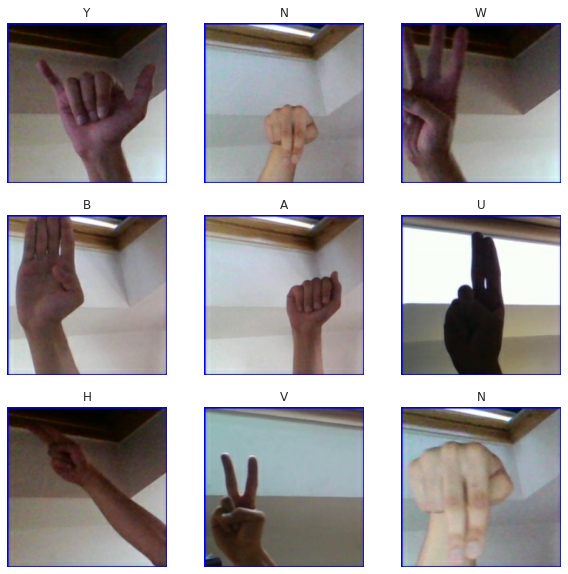

In [178]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [179]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [180]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 1
Number of test batches: 0


In [181]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom((-0.2, 0.2), (-0.2, 0.2)),
    tf.keras.layers.experimental.preprocessing.RandomTranslation((-0.2, 0.2), (-0.2, 0.2)),
])

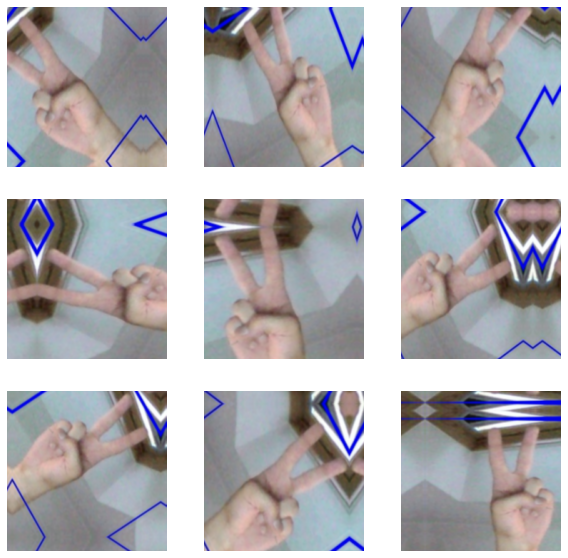

In [182]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [183]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [184]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [185]:
train_dataset = train_dataset.map(lambda x, y: (rescale(x, training=True), y))
proc_validation_dataset = validation_dataset.map(lambda x, y: (rescale(x, training=True), y))

# apply augmentation
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [186]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
proc_validation_dataset = proc_validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [187]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [188]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [189]:
base_model.trainable = False

In [190]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [191]:
NUM_CLASSES = len(class_names)
prediction_layer = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")

In [192]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [193]:
base_learning_rate = 1e-3
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [194]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                           

In [195]:
len(model.trainable_variables)

2

In [196]:
initial_epochs = 25

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=proc_validation_dataset)

Epoch 1/25
 127/2719 [>.............................] - ETA: 1:05:53 - loss: 3.5409 - accuracy: 0.0337